In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

In [ ]:
# from scipy.integrate import solve_ivp
# def oscillation(t, y): return -g*sin()

In [36]:
time_duration = 20
no_steps = 10000

In [37]:
def pend(y, t, g, L):
    theta, omega = y
    dydt = [omega, -(g/L)*np.sin(theta)]
    return dydt

In [38]:
# g = 9.8
# L = 2

In [39]:
# theta0_degrees = 89
# theta0 = (theta0_degrees/180)*np.pi

# omega0 = 0

In [40]:
# y0 = [theta0, omega0]

In [43]:
# t = np.linspace(0, time_duration, no_steps)

In [44]:
# sol = odeint(pend, y0, t, args=(g, L))

In [55]:
theta_=np.arange(0,80,5)
len_ =np.arange(0.1,2.2,0.2)

In [58]:
theta_0s=[]
lengths=[]
times=[]
thetas=[]

g = 9.8
omega0 = 0

t = np.linspace(0, time_duration, no_steps)

for theta0_degrees in theta_:
    for L in len_:
        theta0 = (theta0_degrees/180)*np.pi
        y0 = [theta0, omega0]
        
        sol = odeint(pend, y0, t, args=(g, L))

        theta_0s.extend([theta0]*no_steps)
        lengths.extend([L]*no_steps)
        times.extend(t)
        thetas.extend(sol[:,0])

In [64]:
pd_data=pd.DataFrame({"times":times,"lengths":lengths,"theta_0s":theta_0s,"thetas":thetas})
ddf=pd_data.sample(frac=1).reset_index(drop=True)

In [65]:
ddf.head()

,times,lengths,theta_0s,thetas
0,6.606661,2.1,1.134464,0.966396
1,2.550255,0.7,0.087266,-0.086711
2,19.487949,0.9,0.000000,0.000000
3,13.551355,0.7,0.000000,0.000000
4,13.733373,0.1,1.308997,-0.702529


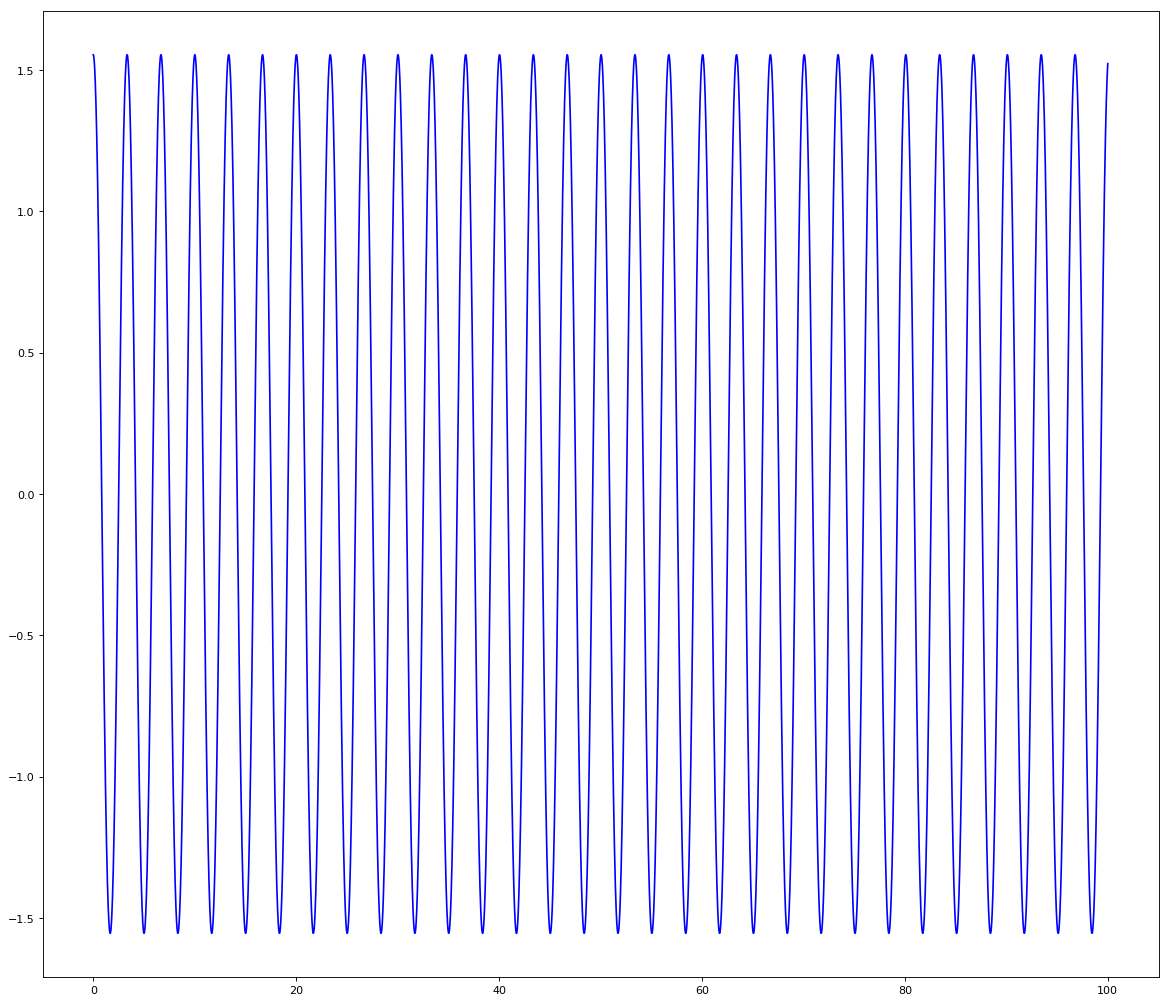

In [34]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, sol[:, 0], 'b', label='theta(t)')